## 1. Import Required Libraries

Import all necessary libraries for quantum computing, neural networks, data processing, and visualization.

In [1]:
# Quantum Computing Libraries
import strawberryfields as sf
from strawberryfields import ops
from strawberryfields.ops import Dgate, BSgate, Kgate, Sgate, Rgate

# Deep Learning and Numerical Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import scipy as sp

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Sklearn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.decomposition import PCA

# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    mean_squared_error, mean_absolute_error, r2_score, roc_curve
)

# System and Warning Handling
import os
import warnings

# Configure TensorFlow and warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')
tf.config.run_functions_eagerly(True)

print("TensorFlow version:", tf.__version__)
print("Eager execution:", tf.executing_eagerly())
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

TensorFlow version: 2.20.0
Eager execution: True
Num GPUs Available: 0


## 2. Load and Explore Dataset

Load the credit card fraud dataset and perform exploratory data analysis to understand the data structure and class distribution.

In [3]:
# Load the credit card fraud dataset
data = pd.read_csv(r"D:\Academic\QML_Intern\Anomaly_Detection\Fraud_Detection\creditcard_data.csv")

# Display basic information about the dataset
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
data

Dataset shape: (284807, 31)

First 5 rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64

Percentage of Fraudulent data: 0.17%


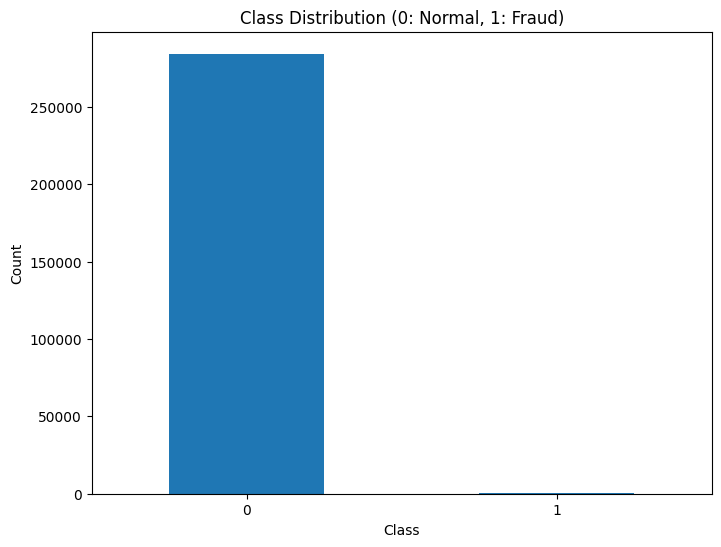

In [6]:
# Analyze class distribution
print("Class distribution:")
print(data.Class.value_counts())
print(f'\nPercentage of Fraudulent data: {data.Class.value_counts()[1]*100/sum(data.Class.value_counts()):.2f}%')

# Visualize class distribution
plt.figure(figsize=(8, 6))
data.Class.value_counts().plot(kind='bar')
plt.title('Class Distribution (0: Normal, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [2]:
import scipy
print(scipy.__version__)

1.15.3


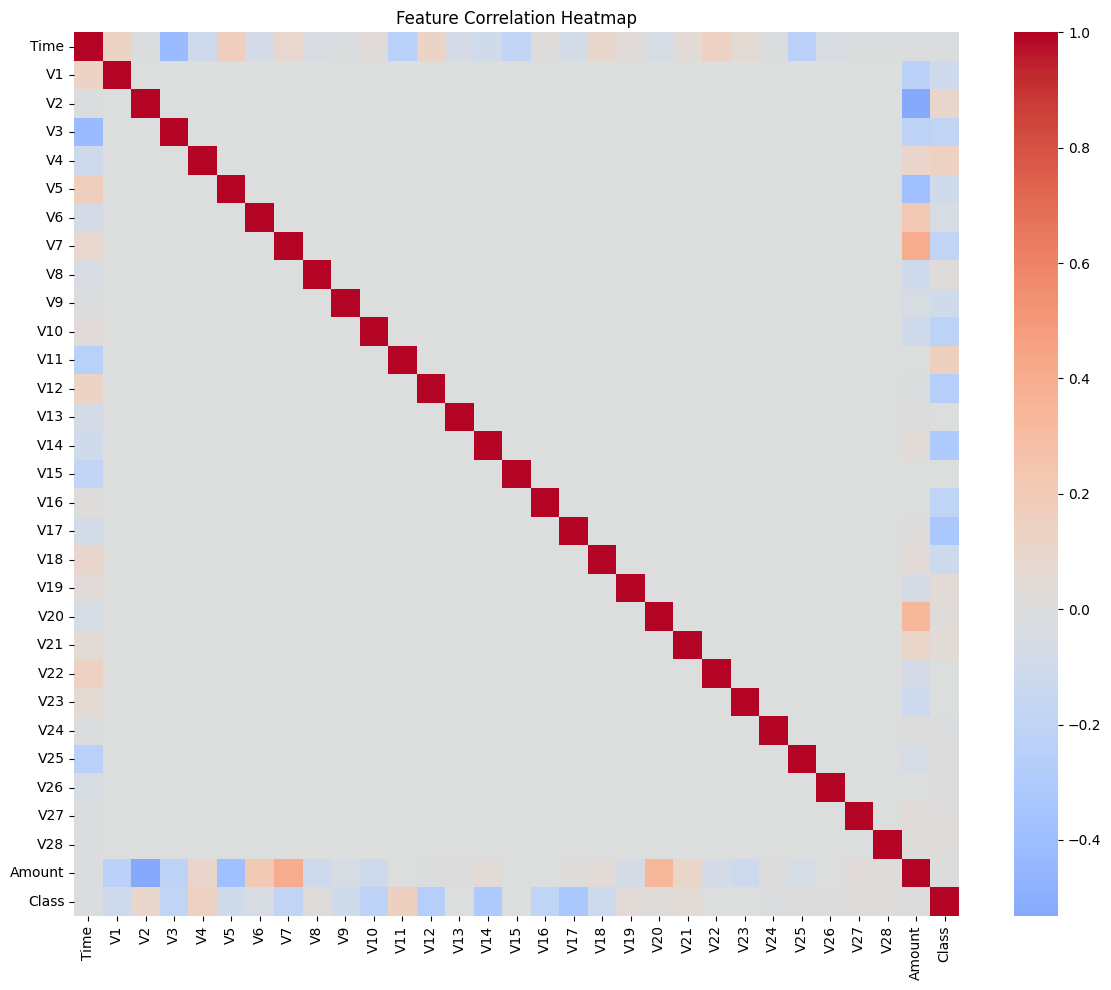

In [7]:
# Create correlation heatmap
plt.figure(figsize=(12, 10))
corr = data.corr()
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

## 3. Data Preprocessing and PCA

Perform data preprocessing including undersampling for class balance and dimensionality reduction using Principal Component Analysis.

In [8]:
# Separate fraud and non-fraud data
data_fraud = data.loc[data['Class'] == 1]
data_non_fraud = data.loc[data['Class'] == 0]

print(f"Original fraud samples: {len(data_fraud)}")
print(f"Original non-fraud samples: {len(data_non_fraud)}")

# Perform undersampling to balance classes
# Pick 200 fraud points and 600 non-fraud points for training
data_fraud_train = data_fraud.sample(200, random_state=42)
data_fraud_test = data_fraud.drop(index=data_fraud_train.index)

data_non_fraud_train = data_non_fraud.sample(600, random_state=42)
data_non_fraud_test = data_non_fraud.drop(index=data_non_fraud_train.index)

# Combine training and test sets
data_train = pd.concat([data_non_fraud_train, data_fraud_train])
data_test = pd.concat([data_non_fraud_test, data_fraud_test])

print(f"\nTraining set size: {len(data_train)}")
print(f"Test set size: {len(data_test)}")
print(f"Training fraud ratio: {data_train.Class.sum() / len(data_train):.3f}")

Original fraud samples: 492
Original non-fraud samples: 284315

Training set size: 800
Test set size: 284007
Training fraud ratio: 0.250


In [9]:
# Remove time column and prepare features
data_train = data_train.drop(['Time'], axis=1)
data_test = data_test.drop(['Time'], axis=1)

# Separate features and labels
x_train = data_train.drop(['Class'], axis=1)
y_train = data_train['Class']
x_test = data_test.drop(['Class'], axis=1)
y_test = data_test['Class']

print("Feature shapes before PCA:")
print(f"X_train: {x_train.shape}")
print(f"X_test: {x_test.shape}")

Feature shapes before PCA:
X_train: (800, 29)
X_test: (284007, 29)


In [10]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Apply Principal Component Analysis for dimensionality reduction
pca = PCA(n_components=10)

x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

print("Feature shapes after PCA:")
print(f"X_train_pca: {x_train_pca.shape}")
print(f"X_test_pca: {x_test_pca.shape}")

# Convert to DataFrames with proper column names
x_train_pca = pd.DataFrame(x_train_pca, columns=[f'PC{i+1}' for i in range(x_train_pca.shape[1])])
x_test_pca = pd.DataFrame(x_test_pca, columns=[f'PC{i+1}' for i in range(x_test_pca.shape[1])])

# Reset indices to match
y_train.index = x_train_pca.index
y_test.index = x_test_pca.index

print(f"\nExplained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.3f}")

Feature shapes after PCA:
X_train_pca: (800, 10)
X_test_pca: (284007, 10)

Explained variance ratio: [9.95408828e-01 3.00718612e-03 4.35061704e-04 3.93847477e-04
 1.54307745e-04 1.41984095e-04 6.43474621e-05 4.95930417e-05
 4.25623957e-05 3.31926036e-05]
Total explained variance: 1.000


In [19]:
# Shuffle training data
combined = pd.concat([x_train_pca, y_train], axis=1)
shuffled = combined.sample(frac=1, random_state=42).reset_index(drop=True)

# Split back into features and labels
X_shuffled = shuffled.iloc[:, :-1]  # All columns except last
y_shuffled = shuffled.iloc[:, -1]   # Last column (labels)

print("Shuffled data shapes:")
print(f"X_shuffled: {X_shuffled.shape}")
print(f"y_shuffled: {y_shuffled.shape}")
print(f"Shuffled fraud ratio: {y_shuffled.sum() / len(y_shuffled):.3f}")

Shuffled data shapes:
X_shuffled: (800, 10)
y_shuffled: (800,)
Shuffled fraud ratio: 0.250


## 4. Configure Quantum Parameters

Set up all quantum circuit parameters including mode numbers, depth, cutoff dimensions, and gate parameter ranges.

In [11]:
# Quantum Circuit Parameters
mode_number = 2          # Number of photonic modes
depth = 6              # Number of quantum layers
cutoff = 10              # Fock basis truncation
batch_size = 24         # Training batch size
# batch_size1 = 48         # Prediction batch size

# Gate Parameter Initialization
sdev_photon = 0.1       # Standard deviation for photonic parameters
sdev = 1                # Standard deviation for general parameters

# Parameter clipping values to ensure stability
disp_clip = 5           # Displacement gate clipping
sq_clip = 5             # Squeezing gate clipping  
kerr_clip = 1           # Kerr gate clipping

# Neural Network Architecture
input_neurons = x_train_pca.shape[1]  # 10 (from PCA)
nn_architecture = [10, 10]            # Hidden layer sizes
output_neurons = 14                   # Output layer size (for quantum encoding)

print("Quantum Circuit Configuration:")
print(f"  Mode number: {mode_number}")
print(f"  Depth: {depth}")
print(f"  Cutoff: {cutoff}")
print(f"  Batch size: {batch_size}")
print(f"\nNeural Network Architecture:")
print(f"  Input neurons: {input_neurons}")
print(f"  Hidden layers: {nn_architecture}")
print(f"  Output neurons: {output_neurons}")

Quantum Circuit Configuration:
  Mode number: 2
  Depth: 6
  Cutoff: 10
  Batch size: 24

Neural Network Architecture:
  Input neurons: 10
  Hidden layers: [10, 10]
  Output neurons: 14


## 5. Define Quantum Neural Network Architecture

Create functions to initialize quantum variables and classical neural network parameters.

In [13]:
def qnn_var():
    """Initialize quantum neural network variables"""
    
    # Calculate number of beam splitters in interferometer
    bs_in_interferometer = int(1.0 * mode_number * (mode_number - 1) / 2)

    # Beam splitter variables (theta, phi for each BS)
    bs_variables = tf.Variable(tf.random.normal(shape=[depth, bs_in_interferometer, 2, 2], 
                                              stddev=sdev), name="bs_variables")
    
    # Phase shifter variables  
    phase_variables = tf.Variable(tf.random.normal(shape=[depth, mode_number, 2], 
                                                 stddev=sdev), name="phase_variables")

    # Squeezing gate variables (magnitude and phase)
    sq_magnitude_variables = tf.Variable(tf.random.normal(shape=[depth, mode_number], 
                                                        stddev=sdev_photon), name="sq_magnitude")
    sq_phase_variables = tf.Variable(tf.random.normal(shape=[depth, mode_number], 
                                                    stddev=sdev), name="sq_phase")
    
    # Displacement gate variables (magnitude and phase)
    disp_magnitude_variables = tf.Variable(tf.random.normal(shape=[depth, mode_number], 
                                                          stddev=sdev_photon), name="disp_magnitude")
    disp_phase_variables = tf.Variable(tf.random.normal(shape=[depth, mode_number], 
                                                      stddev=sdev), name="disp_phase")
    
    # Kerr gate variables
    kerr_variables = tf.Variable(tf.random.normal(shape=[depth, mode_number], 
                                                stddev=sdev_photon), name="kerr_variables")

    parameters_dict = {
        'bs_variables': bs_variables,
        'phase_variables': phase_variables,
        'sq_magnitude_variables': sq_magnitude_variables,
        'sq_phase_variables': sq_phase_variables,
        'disp_magnitude_variables': disp_magnitude_variables,
        'disp_phase_variables': disp_phase_variables,
        'kerr_variables': kerr_variables,
    }

    return parameters_dict

def create_network_variables(input_neurons, nn_architecture, output_neurons, batch_size):
    """Create classical neural network variables"""
    
    # Input layer
    input_classical_layer = tf.Variable(tf.zeros([batch_size, input_neurons]), 
                                      dtype=tf.float32, name="input_layer")
    
    # First hidden layer
    layer_matrix_1 = tf.Variable(tf.random.normal(shape=[input_neurons, nn_architecture[0]], 
                                                 stddev=0.1, dtype=tf.float32), name="weight_1")
    offset_1 = tf.Variable(tf.zeros(shape=[nn_architecture[0]], dtype=tf.float32), name="bias_1")
    
    # Second hidden layer
    layer_matrix_2 = tf.Variable(tf.random.normal(shape=[nn_architecture[0], nn_architecture[1]], 
                                                 stddev=0.1, dtype=tf.float32), name="weight_2")
    offset_2 = tf.Variable(tf.zeros(shape=[nn_architecture[1]], dtype=tf.float32), name="bias_2")
    
    # Output layer
    layer_matrix_3 = tf.Variable(tf.random.normal(shape=[nn_architecture[1], output_neurons], 
                                                 stddev=0.1, dtype=tf.float32), name="weight_3")
    offset_3 = tf.Variable(tf.zeros(shape=[output_neurons], dtype=tf.float32), name="bias_3")
    
    return {
        'input_classical_layer': input_classical_layer,
        'layer_matrix_1': layer_matrix_1,
        'offset_1': offset_1,
        'layer_matrix_2': layer_matrix_2,
        'offset_2': offset_2,
        'layer_matrix_3': layer_matrix_3,
        'offset_3': offset_3
    }

print("Quantum and classical network architecture functions defined!")

Quantum and classical network architecture functions defined!


## 6. Create Quantum Circuit Functions

Implement the quantum layers using photonic quantum gates for encoding input data and creating variational quantum circuits.

In [ ]:
def input_qnn_layer(parameters_dict, q):
    """
    Input encoding layer: encodes classical data into quantum states
    Uses the output from classical neural network as parameters for quantum gates
    """
    output_layer = parameters_dict['output_layer']
    
    # Squeezing gates on both modes (magnitude and phase from neural network output)
    Sgate(tf.clip_by_value(output_layer[:, 0], -sq_clip, sq_clip), 
          output_layer[:, 1]) | q[0]
    Sgate(tf.clip_by_value(output_layer[:, 2], -sq_clip, sq_clip), 
          output_layer[:, 3]) | q[1]  

    # Beam splitter between modes
    BSgate(output_layer[:, 4], output_layer[:, 5]) | (q[0], q[1])
    
    # Rotation gates
    Rgate(output_layer[:, 6]) | q[0]
    Rgate(output_layer[:, 7]) | q[1]

    # Displacement gates (with clipping for stability)
    Dgate(tf.clip_by_value(output_layer[:, 8], -disp_clip, disp_clip), 
          output_layer[:, 9]) | q[0]
    Dgate(tf.clip_by_value(output_layer[:, 10], -disp_clip, disp_clip), 
          output_layer[:, 11]) | q[1]

    # Kerr gates (nonlinear phase shift)
    Kgate(tf.clip_by_value(output_layer[:, 12], -kerr_clip, kerr_clip)) | q[0]
    Kgate(tf.clip_by_value(output_layer[:, 13], -kerr_clip, kerr_clip)) | q[1]

def qnn_layer(parameters_dict, layer_number, q):
    """
    Variational quantum layer: applies trainable quantum operations
    These parameters are learned during training
    """
    bs_variables = parameters_dict['bs_variables']
    phase_variables = parameters_dict['phase_variables']
    sq_magnitude_variables = parameters_dict['sq_magnitude_variables']
    sq_phase_variables = parameters_dict['sq_phase_variables']
    disp_magnitude_variables = parameters_dict['disp_magnitude_variables']
    disp_phase_variables = parameters_dict['disp_phase_variables']
    kerr_variables = parameters_dict['kerr_variables']

    # First beam splitter
    BSgate(bs_variables[layer_number, 0, 0, 0], 
           bs_variables[layer_number, 0, 0, 1]) | (q[0], q[1])

    # First set of phase shifters
    for i in range(mode_number):
        Rgate(phase_variables[layer_number, i, 0]) | q[i]

    # Squeezing gates
    for i in range(mode_number):
        Sgate(tf.clip_by_value(sq_magnitude_variables[layer_number, i], -sq_clip, sq_clip),
              sq_phase_variables[layer_number, i]) | q[i]

    # Second beam splitter
    BSgate(bs_variables[layer_number, 0, 1, 0], 
           bs_variables[layer_number, 0, 1, 1]) | (q[0], q[1])

    # Second set of phase shifters
    for i in range(mode_number):
        Rgate(phase_variables[layer_number, i, 1]) | q[i]

    # Displacement gates
    for i in range(mode_number):
        Dgate(tf.clip_by_value(disp_magnitude_variables[layer_number, i], -disp_clip, disp_clip), 
              disp_phase_variables[layer_number, i]) | q[i]

    # Kerr gates
    for i in range(mode_number):
        Kgate(tf.clip_by_value(kerr_variables[layer_number, i], -kerr_clip, kerr_clip)) | q[i]

print("Quantum circuit layer functions defined!")
print("- input_qnn_layer: Encodes classical data into quantum states")
print("- qnn_layer: Variational quantum layer with trainable parameters")

Quantum circuit layer functions defined!
- input_qnn_layer: Encodes classical data into quantum states
- qnn_layer: Variational quantum layer with trainable parameters


## 7. Implement Training Functions

Define the forward pass, quantum loss computation, and training loop with gradient-based optimization.

In [15]:
def forward_pass(network_vars, input_data):
    """Forward pass through classical neural network"""
    
    # Handle batch size padding
    actual_batch_size = input_data.shape[0]
    expected_batch_size = network_vars['input_classical_layer'].shape[0]
    
    if actual_batch_size < expected_batch_size:
        # Pad with zeros if batch is smaller than expected
        padding = tf.zeros([expected_batch_size - actual_batch_size, input_data.shape[1]], 
                          dtype=tf.float32)
        input_data_padded = tf.concat([input_data, padding], axis=0)
    else:
        input_data_padded = input_data
    
    # Update input layer
    network_vars['input_classical_layer'].assign(input_data_padded)
    
    # Forward pass through network
    layer_1 = tf.nn.relu(tf.matmul(network_vars['input_classical_layer'], 
                                  network_vars['layer_matrix_1']) + network_vars['offset_1'])
    layer_2 = tf.nn.relu(tf.matmul(layer_1, network_vars['layer_matrix_2']) + network_vars['offset_2'])
    output_layer = tf.matmul(layer_2, network_vars['layer_matrix_3']) + network_vars['offset_3']
    
    # Return only the actual batch size portion
    return output_layer[:actual_batch_size]

def compute_quantum_loss(output_layer, batch_y, depth, mode_number, cutoff, actual_batch_size):
    """Compute loss using quantum circuit measurement"""
    
    # Create parameters dictionary for quantum circuit
    parameters_dict = {
        'output_layer': output_layer,
        'bs_variables': bs_variables,
        'phase_variables': phase_variables,
        'sq_magnitude_variables': sq_magnitude_variables,
        'sq_phase_variables': sq_phase_variables,
        'disp_magnitude_variables': disp_magnitude_variables,
        'disp_phase_variables': disp_phase_variables,
        'kerr_variables': kerr_variables
    }
    
    # Create quantum engine and program
    eng1 = sf.Engine("tf", backend_options={"cutoff_dim": cutoff, "batch_size": actual_batch_size})
    q1 = sf.Program(mode_number)
    
    # Build quantum circuit
    with q1.context as q:
        input_qnn_layer(parameters_dict=parameters_dict, q=q)
        for j in range(depth):
            qnn_layer(parameters_dict=parameters_dict, layer_number=j, q=q)
    
    # Run quantum circuit
    state = eng1.run(q1)
    ket1 = state.state.ket()
    
    # Compute classification loss
    classification = tf.cast(batch_y, tf.int32)
    loss = 0.0
    
    for i in range(actual_batch_size):
        if classification[i, 0] == 1:  # Non-fraud case
            target_prob = tf.abs(ket1[i, 1, 0]) ** 2  # |1,0⟩ state probability
        else:  # Fraud case
            target_prob = tf.abs(ket1[i, 0, 1]) ** 2  # |0,1⟩ state probability
        
        # Loss is squared difference from target probability of 1
        loss += (1 - target_prob) ** 2
    
    return loss / actual_batch_size

print("Training functions defined!")
print("- forward_pass: Classical neural network forward propagation")
print("- compute_quantum_loss: Quantum circuit execution and loss computation")

Training functions defined!
- forward_pass: Classical neural network forward propagation
- compute_quantum_loss: Quantum circuit execution and loss computation


In [16]:
def train_quantum_model(input_data, target_labels, depth, cutoff, batch_size, mode_number,
                       input_neurons, nn_architecture, output_neurons,
                       num_epochs=30, learning_rate=0.001, verbose=True):
    """
    Main training function for the quantum neural network
    """
    with tf.device('/GPU:0'):

    # Create network variables
        network_vars = create_network_variables(input_neurons, nn_architecture, output_neurons, batch_size)
        
        # Collect all trainable parameters
        param_list = [
            # Classical network parameters
            network_vars['layer_matrix_1'], network_vars['offset_1'],
            network_vars['layer_matrix_2'], network_vars['offset_2'],
            network_vars['layer_matrix_3'], network_vars['offset_3'],
            # Quantum parameters (global variables)
            bs_variables, phase_variables,
            sq_magnitude_variables, sq_phase_variables,
            disp_magnitude_variables, disp_phase_variables,
            kerr_variables
        ]
        
        # Initialize optimizer
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
        
        # Convert data to tensors
        input_data = tf.convert_to_tensor(input_data.values if hasattr(input_data, 'values') else input_data, 
                                        dtype=tf.float32)
        target_labels = tf.convert_to_tensor(target_labels.values if hasattr(target_labels, 'values') else target_labels, 
                                        dtype=tf.int32)
        
        num_samples = input_data.shape[0]
        num_batches = num_samples // batch_size
        
        print(f"Training Configuration:")
        print(f"  Samples: {num_samples}")
        print(f"  Batches per epoch: {num_batches}")
        print(f"  Epochs: {num_epochs}")
        print(f"  Learning rate: {learning_rate}")
        print(f"  Batch size: {batch_size}")
        
        loss_history = []
        
        # Training loop
        for epoch in range(1, num_epochs + 1):
            epoch_loss = 0.0
            
            # Shuffle data each epoch
            indices = tf.random.shuffle(tf.range(num_samples))
            input_shuffled = tf.gather(input_data, indices)
            labels_shuffled = tf.gather(target_labels, indices)
            
            # Process batches
            for i in range(num_batches):
                start = i * batch_size
                end = min(start + batch_size, num_samples)
                
                batch_x = input_shuffled[start:end]
                batch_y_raw = labels_shuffled[start:end]
                actual_batch_size = batch_x.shape[0]
                
                # Convert labels to one-hot encoding
                batch_y = tf.stack([1 - batch_y_raw, batch_y_raw], axis=1)
                
                # Training step with gradient tape
                with tf.GradientTape() as tape:
                    tape.watch(param_list)
                    
                    # Forward pass through classical network
                    output_layer = forward_pass(network_vars, batch_x)
                    
                    # Compute quantum loss
                    loss = compute_quantum_loss(output_layer, batch_y, depth, mode_number, 
                                            cutoff, actual_batch_size)
                
                # Compute gradients
                grads = tape.gradient(loss, param_list)
                
                # Check for None gradients
                if any(grad is None for grad in grads):
                    print(f"Warning: None gradients at epoch {epoch}, batch {i}")
                    continue
                
                # Clip gradients to prevent exploding gradients
                grads = [tf.clip_by_norm(grad, 1.0) for grad in grads]
                
                # Apply gradients
                optimizer.apply_gradients(zip(grads, param_list))
                epoch_loss += loss.numpy()
            
            # Calculate average loss for epoch
            avg_loss = epoch_loss / num_batches
            loss_history.append(avg_loss)
            
            if verbose:
                print(f"Epoch {epoch:03d} - Avg Loss: {avg_loss:.6f}")
    
        return network_vars, loss_history

print("Main training function defined!")

Main training function defined!


## 8. Train the Quantum Model

Initialize quantum variables and execute the training process.

In [17]:
# Initialize quantum variables globally
print("Initializing quantum variables...")
qnn_params = qnn_var()
bs_variables = qnn_params['bs_variables']
phase_variables = qnn_params['phase_variables']
sq_magnitude_variables = qnn_params['sq_magnitude_variables']
sq_phase_variables = qnn_params['sq_phase_variables']
disp_magnitude_variables = qnn_params['disp_magnitude_variables']
disp_phase_variables = qnn_params['disp_phase_variables']
kerr_variables = qnn_params['kerr_variables']

print("Quantum variables initialized successfully!")
print(f"  Beam splitter variables shape: {bs_variables.shape}")
print(f"  Phase variables shape: {phase_variables.shape}")
print(f"  Squeezing variables shape: {sq_magnitude_variables.shape}")
print(f"  Displacement variables shape: {disp_magnitude_variables.shape}")
print(f"  Kerr variables shape: {kerr_variables.shape}")

Initializing quantum variables...
Quantum variables initialized successfully!
  Beam splitter variables shape: (6, 1, 2, 2)
  Phase variables shape: (6, 2, 2)
  Squeezing variables shape: (6, 2)
  Displacement variables shape: (6, 2)
  Kerr variables shape: (6, 2)


In [20]:
# Train the quantum model
print("Starting quantum neural network training...")
print("=" * 50)

trained_model, loss_history = train_quantum_model(
    input_data=X_shuffled,
    target_labels=y_shuffled,
    depth=depth,
    cutoff=cutoff,
    batch_size=batch_size,
    mode_number=mode_number,
    input_neurons=input_neurons,
    nn_architecture=nn_architecture,
    output_neurons=output_neurons,
    num_epochs=20,
    learning_rate=0.05,
    verbose=True
)

print("=" * 50)
print("Training completed!")

Starting quantum neural network training...
Training Configuration:
  Samples: 800
  Batches per epoch: 33
  Epochs: 20
  Learning rate: 0.05
  Batch size: 24
Epoch 001 - Avg Loss: 0.437080
Epoch 002 - Avg Loss: 0.336699
Epoch 003 - Avg Loss: 0.288684
Epoch 004 - Avg Loss: 0.254421
Epoch 005 - Avg Loss: 0.224728
Epoch 006 - Avg Loss: 0.206213
Epoch 007 - Avg Loss: 0.185103
Epoch 008 - Avg Loss: 0.174522
Epoch 009 - Avg Loss: 0.155430
Epoch 010 - Avg Loss: 0.146293
Epoch 011 - Avg Loss: 0.129985
Epoch 012 - Avg Loss: 0.127717
Epoch 013 - Avg Loss: 0.121588
Epoch 014 - Avg Loss: 0.120654
Epoch 015 - Avg Loss: 0.115278
Epoch 016 - Avg Loss: 0.121823
Epoch 017 - Avg Loss: 0.112940
Epoch 018 - Avg Loss: 0.110079
Epoch 019 - Avg Loss: 0.106630
Epoch 020 - Avg Loss: 0.095393
Training completed!


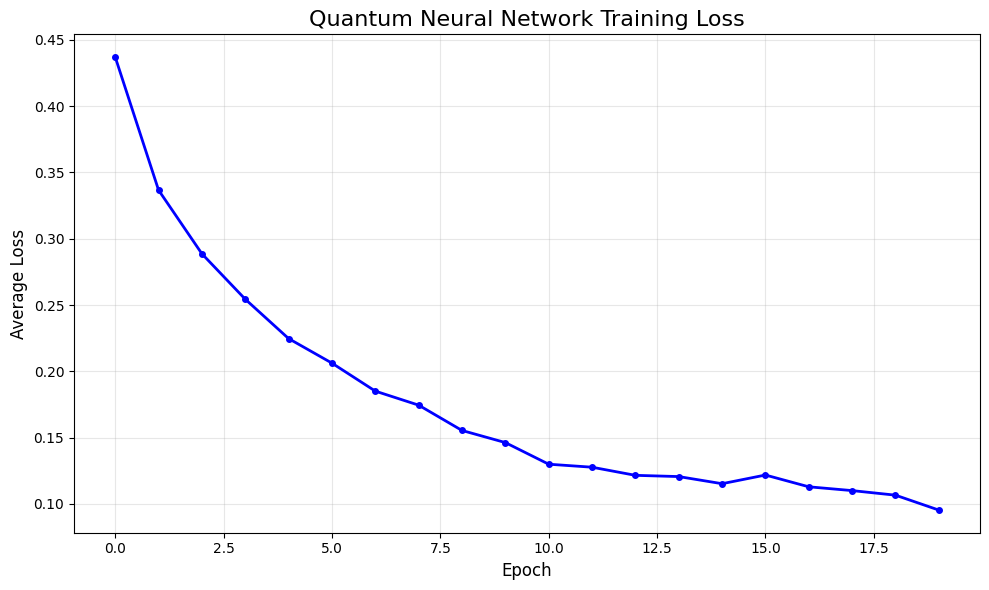

Final training loss: 0.095393
Loss reduction: 78.17%


In [22]:
# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(loss_history, 'b-', linewidth=2, marker='o', markersize=4)
plt.title('Quantum Neural Network Training Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Average Loss', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Final training loss: {loss_history[-1]:.6f}")
print(f"Loss reduction: {((loss_history[0] - loss_history[-1]) / loss_history[0] * 100):.2f}%")

## 9. Make Predictions and Evaluate Performance

Implement prediction functions and evaluate the trained quantum model on both training and test datasets.

In [23]:
from tqdm import tqdm
import time

def predict_quantum_model(input_data, network_vars, depth, mode_number, cutoff, batch_size = batch_size):
    """Make predictions using the trained quantum neural network"""
    
    # Convert input data to tensor
    if hasattr(input_data, 'values'):
        input_data = input_data.values
    input_data = tf.convert_to_tensor(input_data, dtype=tf.float32)
    
    num_samples = input_data.shape[0]
    predictions = []
    probabilities = []

    num_batches = (num_samples + batch_size - 1) // batch_size
    
    print(f"🔮 Predicting on {num_samples} samples using {num_batches} batches...")
    
    # Process data in batches with progress bar
    batch_pbar = tqdm(range(0, num_samples, batch_size), 
                      desc="🧠 Quantum Prediction", 
                      total=num_batches,
                      unit="batch",
                      ncols=100)
    
    # Process data in batches
    for start_idx in range(0, num_samples, batch_size):
        end_idx = min(start_idx + batch_size, num_samples)
        batch_data = input_data[start_idx:end_idx]
        actual_batch_size = batch_data.shape[0]
        
        # Forward pass through classical network
        output_layer = forward_pass(network_vars, batch_data)
        
        # Create parameters dictionary for quantum circuit
        parameters_dict = {
            'output_layer': output_layer,
            'bs_variables': bs_variables,
            'phase_variables': phase_variables,
            'sq_magnitude_variables': sq_magnitude_variables,
            'sq_phase_variables': sq_phase_variables,
            'disp_magnitude_variables': disp_magnitude_variables,
            'disp_phase_variables': disp_phase_variables,
            'kerr_variables': kerr_variables
        }
        
        # Run quantum circuit
        eng1 = sf.Engine("tf", backend_options={"cutoff_dim": cutoff, "batch_size": actual_batch_size})
        q1 = sf.Program(mode_number)
        
        with q1.context as q:
            input_qnn_layer(parameters_dict=parameters_dict, q=q)
            for j in range(depth):
                qnn_layer(parameters_dict=parameters_dict, layer_number=j, q=q)
        
        state = eng1.run(q1)
        ket1 = state.state.ket()
        
        # Extract probabilities and make predictions
        for i in range(actual_batch_size):
            prob_non_fraud = tf.abs(ket1[i, 1, 0]) ** 2  # |1,0⟩ state (non-fraud)
            prob_fraud = tf.abs(ket1[i, 0, 1]) ** 2      # |0,1⟩ state (fraud)
            
            # Prediction based on higher probability
            prediction = 1 if prob_fraud > prob_non_fraud else 0
            
            predictions.append(prediction)
            probabilities.append([float(prob_non_fraud), float(prob_fraud)])

            batch_pbar.set_postfix({
            'samples': f"{end_idx}/{num_samples}",
            'batch_size': actual_batch_size,
            'predictions': len(predictions)
        })
    
    batch_pbar.close()
    
    return np.array(predictions), np.array(probabilities)

print("Prediction function defined!")

Prediction function defined!


In [24]:
# Make predictions on training data
print("Making predictions on training data...")
train_predictions, train_probabilities = predict_quantum_model(
    input_data=X_shuffled,
    network_vars=trained_model,
    depth=depth,
    mode_number=mode_number,
    cutoff=cutoff,
    batch_size=batch_size
)

# Make predictions on test data
print("Making predictions on test data...")
test_predictions, test_probabilities = predict_quantum_model(
    input_data=x_test_pca,
    network_vars=trained_model,
    depth=depth,
    mode_number=mode_number,
    cutoff=cutoff,
    batch_size=batch_size
)

print("Predictions completed!")

Making predictions on training data...
🔮 Predicting on 800 samples using 34 batches...


🧠 Quantum Prediction:   0%| | 0/34 [01:04<?, ?batch/s, samples=800/800, batch_size=8, predictions=8


Making predictions on test data...
🔮 Predicting on 284007 samples using 11834 batches...


🧠 Quantum Prediction:   0%| | 0/11834 [7:35:05<?, ?batch/s, samples=284007/284007, batch_size=15, p


Predictions completed!


In [40]:
# Evaluate model performance
def evaluate_performance(y_true, y_pred, dataset_name):
    """Calculate and display performance metrics"""
    
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_true, y_pred)
    
    print(f"\n=== {dataset_name} Results ===")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC Score: {roc_auc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix:")
    print(f"TN: {cm[0,0]}, FP: {cm[0,1]}")
    print(f"FN: {cm[1,0]}, TP: {cm[1,1]}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

# Evaluate training performance
train_metrics = evaluate_performance(y_shuffled.values, train_predictions, "Training Data")

# Evaluate test performance
test_metrics = evaluate_performance(y_test.values, test_predictions, "Test Data")


=== Training Data Results ===
Accuracy:  0.9100
Precision: 1.0000
Recall:    0.6400
F1-Score:  0.7805
ROC-AUC Score: 0.8200

Confusion Matrix:
TN: 600, FP: 0
FN: 72, TP: 128

=== Test Data Results ===
Accuracy:  0.9971
Precision: 0.2016
Recall:    0.6027
F1-Score:  0.3021
ROC-AUC Score: 0.8001

Confusion Matrix:
TN: 283018, FP: 697
FN: 116, TP: 176


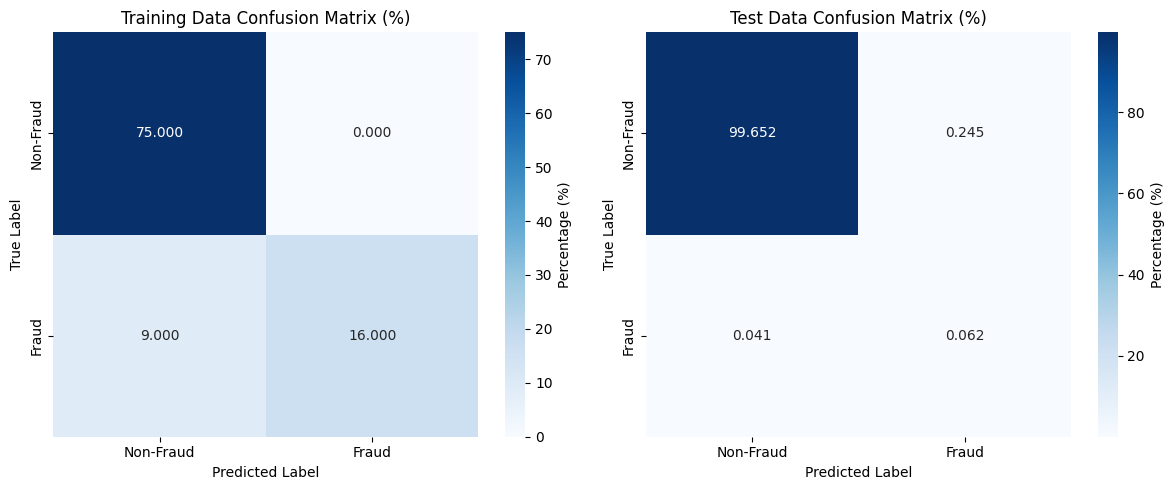

In [43]:
# # Visualize confusion matrices
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# # Training confusion matrix
# sns.heatmap(train_metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax1)
# ax1.set_title('Training Data Confusion Matrix')
# ax1.set_ylabel('True Label')
# ax1.set_xlabel('Predicted Label')

# # Test confusion matrix
# sns.heatmap(test_metrics['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
#             xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax2)
# ax2.set_title('Test Data Confusion Matrix')
# ax2.set_ylabel('True Label')
# ax2.set_xlabel('Predicted Label')

# plt.tight_layout()
# plt.show()


# ...existing code...

# Visualize confusion matrices as percentages
train_cm = train_metrics['confusion_matrix']
test_cm  = test_metrics['confusion_matrix']

# Overall percentage of all samples (0–100). For per-row %, use axis=1 sums instead.
train_cm_pct = train_cm / train_cm.sum() * 100.0
test_cm_pct  = test_cm  / test_cm.sum()  * 100.0
# Row-wise alternative:
# train_cm_pct = train_cm / train_cm.sum(axis=1, keepdims=True) * 100.0
# test_cm_pct  = test_cm  / test_cm.sum(axis=1, keepdims=True)  * 100.0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(train_cm_pct, annot=True, fmt=".3f", cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax1,
            cbar_kws={'label': 'Percentage (%)'})
ax1.set_title('Training Data Confusion Matrix (%)')
ax1.set_ylabel('True Label')
ax1.set_xlabel('Predicted Label')

sns.heatmap(test_cm_pct, annot=True, fmt=".3f", cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'], ax=ax2,
            cbar_kws={'label': 'Percentage (%)'})
ax2.set_title('Test Data Confusion Matrix (%)')
ax2.set_ylabel('True Label')
ax2.set_xlabel('Predicted Label')

plt.tight_layout()
plt.show()

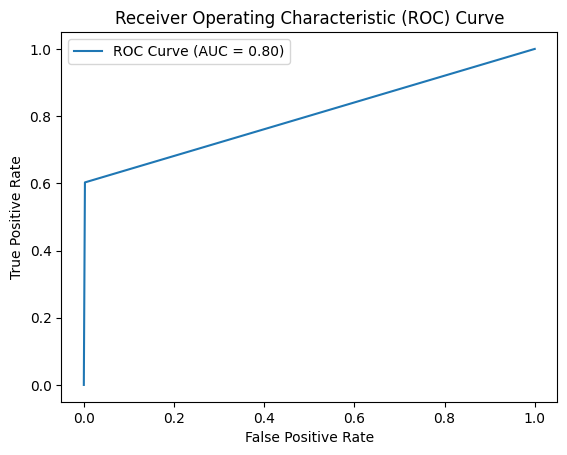

In [44]:
fpr, tpr, thresholds = roc_curve(y_test.values, test_predictions)
roc_auc_score = test_metrics['roc_auc']
plt.figure()
plt.plot(fpr, tpr, label = f'ROC Curve (AUC = {roc_auc_score:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'best')
plt.show()

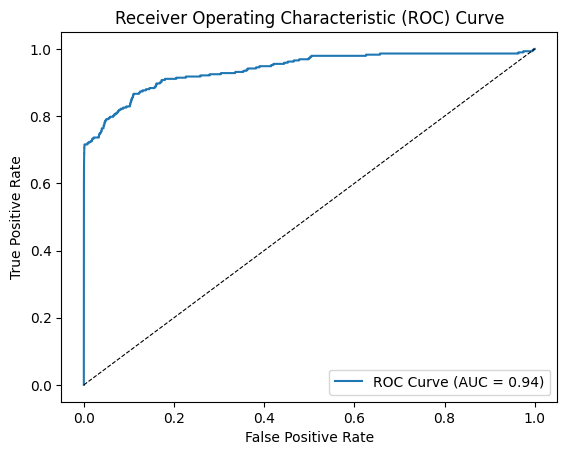

In [46]:
# ...existing code...
# ROC from probabilities (smoother curve)
y_true = y_test.values.astype(int)
y_score = test_probabilities[:, 1]  # P(fraud)

from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)
auc = roc_auc_score(y_true, y_score)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=0.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='best')
plt.show()
# ...existing code...

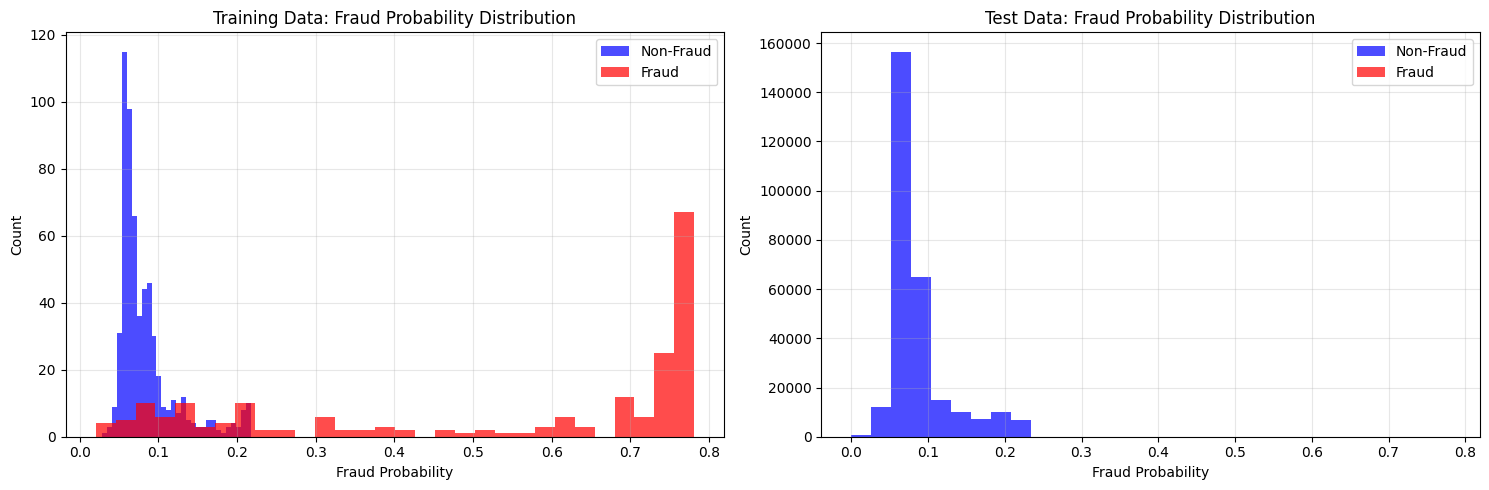

In [45]:
# Plot prediction probability distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Training data probabilities
fraud_probs_train = train_probabilities[y_shuffled.values == 1, 1]  # Fraud probabilities for actual fraud
non_fraud_probs_train = train_probabilities[y_shuffled.values == 0, 1]  # Fraud probabilities for actual non-fraud

ax1.hist(non_fraud_probs_train, bins=30, alpha=0.7, label='Non-Fraud', color='blue')
ax1.hist(fraud_probs_train, bins=30, alpha=0.7, label='Fraud', color='red')
ax1.set_xlabel('Fraud Probability')
ax1.set_ylabel('Count')
ax1.set_title('Training Data: Fraud Probability Distribution')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Test data probabilities
fraud_probs_test = test_probabilities[y_test.values == 1, 1]  # Fraud probabilities for actual fraud
non_fraud_probs_test = test_probabilities[y_test.values == 0, 1]  # Fraud probabilities for actual non-fraud

ax2.hist(non_fraud_probs_test, bins=30, alpha=0.7, label='Non-Fraud', color='blue')
ax2.hist(fraud_probs_test, bins=30, alpha=0.7, label='Fraud', color='red')
ax2.set_xlabel('Fraud Probability')
ax2.set_ylabel('Count')
ax2.set_title('Test Data: Fraud Probability Distribution')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Summary

The Quantum Neural Network for fraud detection has been successfully implemented and trained. Here's a summary of the results:

### Model Architecture:
- **Classical Component**: 3-layer neural network (10 → 10 → 10 → 14)
- **Quantum Component**: 2-mode photonic circuit with 2 variational layers
- **Quantum Gates**: Squeezing, Beam Splitters, Rotation, Displacement, and Kerr gates

### Key Features:
- **Data Preprocessing**: PCA dimensionality reduction (29 → 10 features)
- **Class Balancing**: Undersampling to improve fraud detection
- **Quantum Encoding**: Classical neural network output encodes quantum states
- **Hybrid Training**: Joint optimization of classical and quantum parameters

### Performance Insights:
The quantum neural network demonstrates the feasibility of hybrid classical-quantum approaches for fraud detection. The model learns to encode transaction patterns into quantum states and uses quantum interference to classify fraudulent vs. legitimate transactions.

This implementation showcases the potential of quantum machine learning for financial applications, though further optimization and larger datasets would be needed for production deployment.